<a href="https://colab.research.google.com/github/Carlogui/IMEC_2543/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

<br>

<br>

<font color='black' align="center"><h1> </h1></font>

<font color='black'><h1 align="center">Dinámica de Maquinaria IMEC – 2543</h1></font>

<font color='black'><h1 align="center">Profesor: Johnathan Camargo</h1></font>

<font color='black'><h1 align="center">Taller - Parcial 1</h1></font>

<font color='black'><h1 align="center">Carlos Ernesto Upegui - 202213004</h1></font>

<br>

<br>

<font color='black'><center>17 de Febrero 2025<br>Primer Semestre 2025 <br>Bogotá DC – Colombia </center><br></font>

In [112]:
#Librerías necesarias para el taller
import sympy as sp
import numpy as np
from numpy import linspace, arange, radians, deg2rad, degrees, pi, sqrt, cos, array, piecewise, hypot
from sympy import cos, sin
from sympy.vector import CoordSys3D, cross, dot
from sympy import Matrix, nsimplify, init_printing, pretty, simplify, symbols,  solve, Function, Eq, Matrix, pretty, lambdify, diff
import matplotlib.pyplot as plt
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols
import math
from scipy.optimize import fsolve
import matplotlib.animation as animation

<strong><font color='black'><h1><left> Ejercicio 1</left><h1></strong>


</font>

<strong><font color='black'><u><h1><left>Solución - Ejercicio 1A:</left><h1></font></strong>


<font color='black'><left>
<li>Nodos: Representan los eslabones del mecanismo, incluyendo las barras y los engranajes (J). </li>
<li>Bordes: Representan las uniones cinemáticas entre los eslabones, como las articulaciones revolutas y el par de engranajes (L).</li><br>
En el ejercicio se presentan los siguientes nodos y bordes representados eb la figura:<br>
<font color='black'><left><br>
Eslabones:<br>
<li>Eslabón base (Tierra): Punto fijo de referencia del sistema.</li>
<li>Eslabón de engranaje grande</li>
<li>Eslabón de engranaje Pequeño</li>
<li>Eslabón intermedio: Barra que conecta el engranaje pequeño con la barra de salida.</li>
<li>Eslabón de salida: Barra larga que transmite el movimiento hasta el extremo libre.</li><br>
Bordes:
<li>Pares revoluta: Se encuentran en los ejes de los engranajes y las uniones entre las barras.</li>
<li>Unión por engranajes: Los Engranajes están en contacto entre si o con otro engranaje, acoplados mediante una relación de transmisión fija.</li><br>
Dado que el grafo es una representación simplificada, la tierra del sistema se considera un único nodo, lo que reduce la complejidad sin afectar el análisis del sistema. La transmisión de los engranajes produce el movimiento de todo el sistema a la vez, es decir, que solo tiene un grado de libertad. El calculo se muestra a continuación.


</left></font>

<em><font color='black'><left>Grafo:</left></font></em>



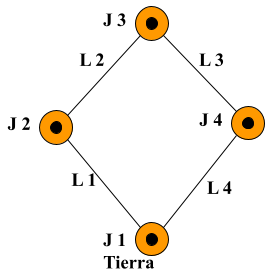

<ul><font color='black'><left>
El <b>número de grados de libertad</b>  del mecanismo se determina utilizando la <b>ecuación de Grübler</b>:</br>
<b>M = 3(L - 1) - 2 * J</b> </br>
Donde:


<li>L = número de eslabones (<b>L = 4</b>)</li>
<li>J = número de pares de un grado de libertad (revolutas) (<b>J = 4</b>)</li>
Sustituyendo los valores en la ecuación:</br>
<b>M = 3(4 - 1) - 2(4) </b><br>
<b>M = 9 - 8</b></br>
<b>M = 1</b>

</ul>

<em><font color='black'><left>Definimos las variables</left></font></em>



In [113]:
M, J, L, H = symbols('M J L H')

valores_conocidos = {

                     J : 4, #Hay 4 revolutas

                     L : 4, #Hay 4 eslabones

                     }

valores_encontrados = {}

<em><font color='black'><left>Definimos las ecuaciones</left></font></em>



In [114]:
Eq_Gruebler = Eq(M, 3 * (L-1) - J * 2)

<em><font color='black'><left>Resolvemos las ecuaciones</left></font></em>



In [115]:
valores_encontrados[M] = solve(Eq_Gruebler, M)[0].subs(valores_conocidos)

print(f"De acuerdo con la ecuación de Gruebler, los grados de libertad del sistema son {valores_encontrados[M]:.0f} ")

De acuerdo con la ecuación de Gruebler, los grados de libertad del sistema son 1 


<em><font color='black'><left>Diagrama (Geared fivebar):</left></font></em>



<font color='black'><left>
Para verificar el calculo hecho con el grafo, se asumirá que el mecanismo es un "Geared fivebar linkage" como se menciona en el libro Design of Machinery de Norton [1]. El diagrama de dicho sistema se visualiza a continuación al igual que el cálculo del DOF:
</left></font>

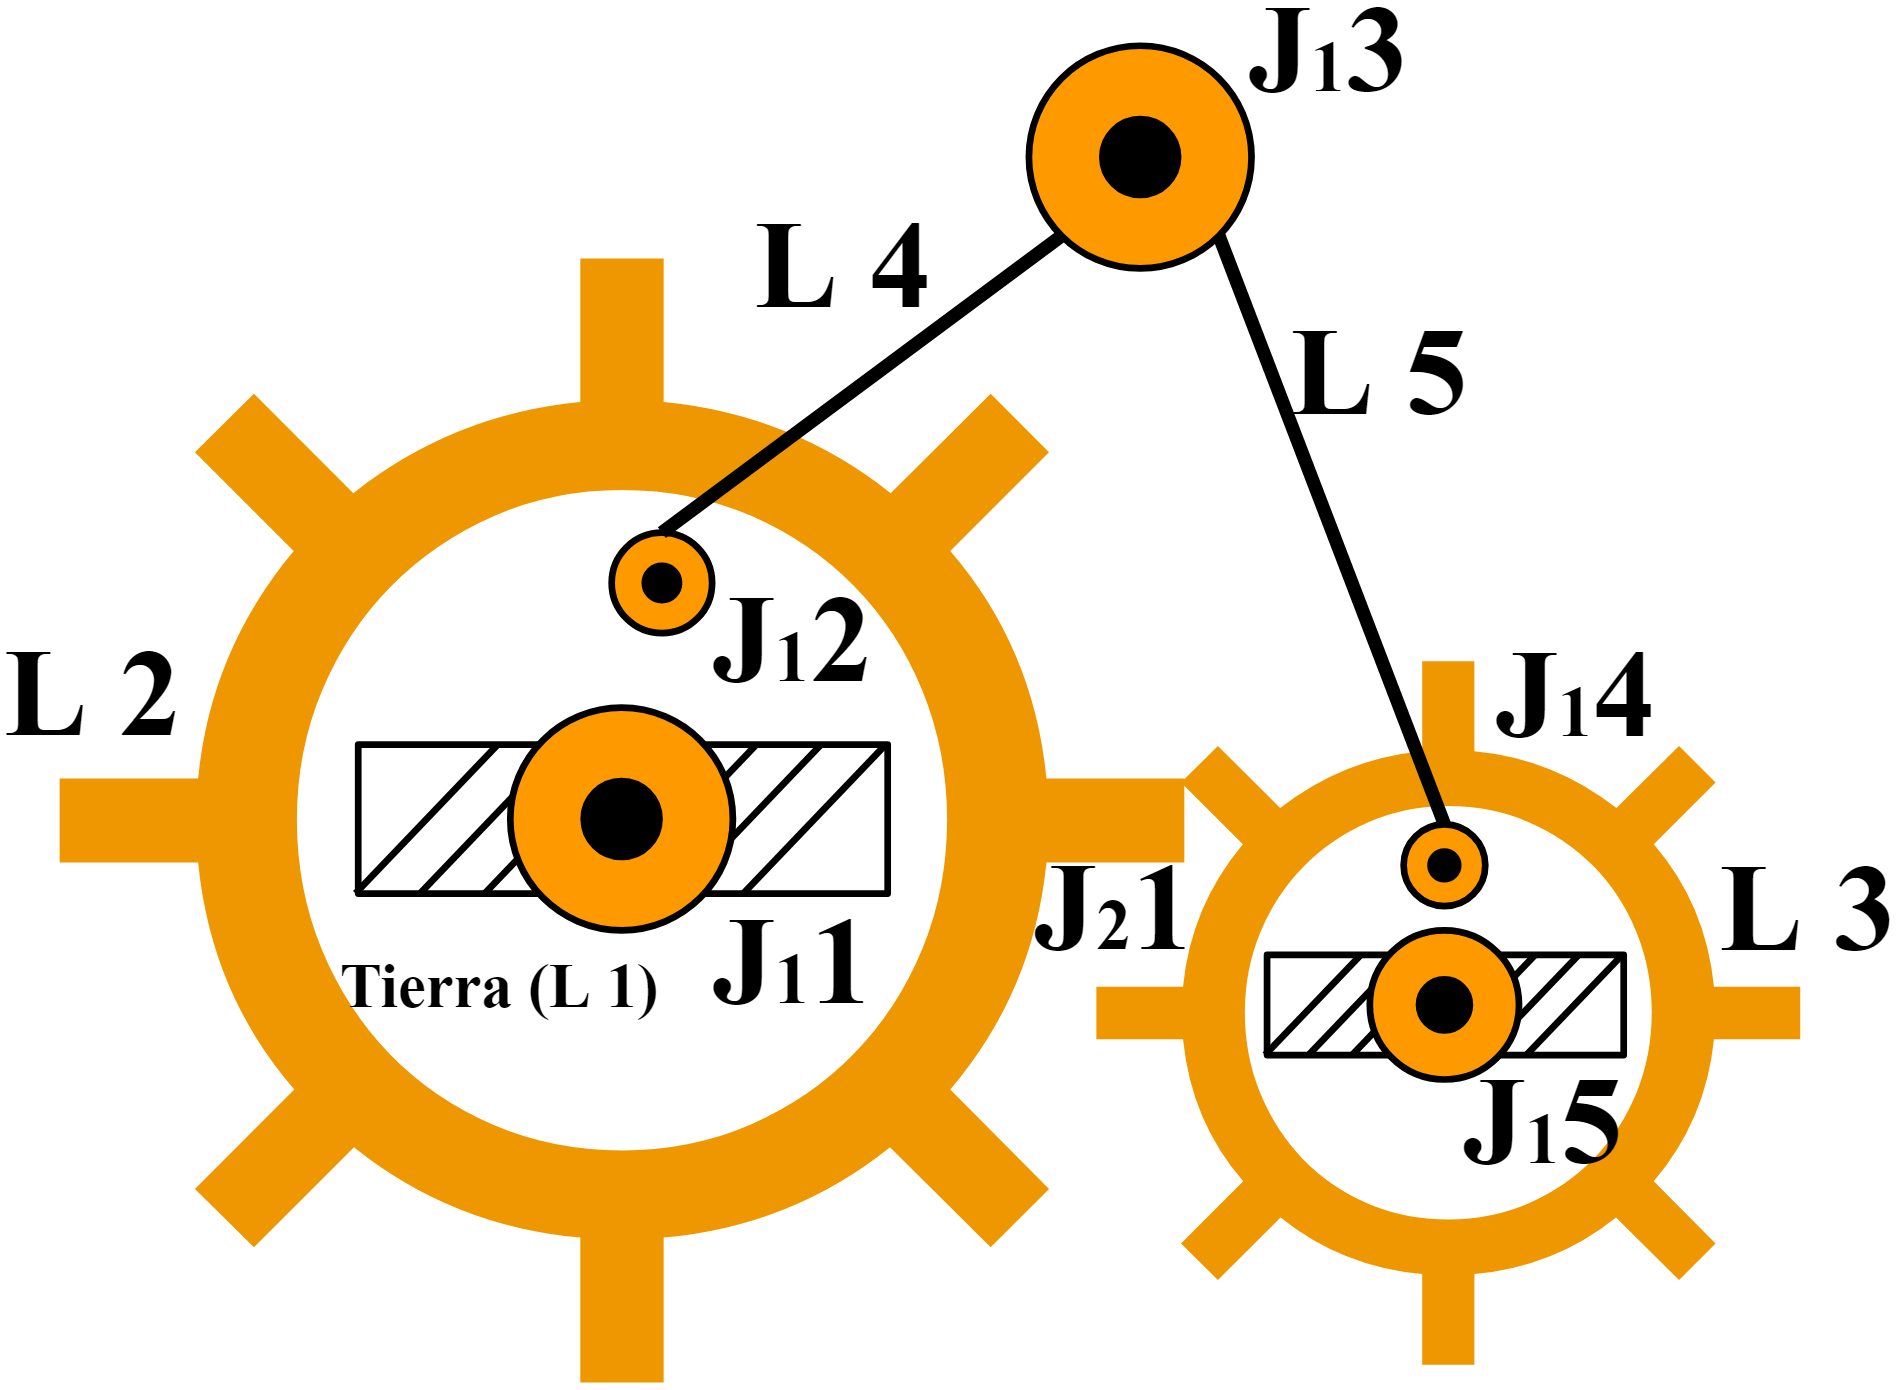

<ul><font color='black'><left>
El <b>número de grados de libertad</b>  del mecanismo se determina utilizando la <b>ecuación de Grübler modificada [1]</b>:</br>
<b>M = 3(L - 1) - 2 * J<sub>1</sub> - J<sub>2</sub></b> </br>
Donde:


<li>L = número de eslabones (<b>L = 5</b>)</li>
<li>J<sub>1</sub> = número de pares de un grado de libertad (revolutas) (<b>J<sub>1</sub> = 5</b>)</li>
<li>J<sub>2</sub> = número de pares de dos grados de libertad (par de engranajes) (<b>J<sub>2</sub> = 1</b>)</li>
Sustituyendo los valores en la ecuación:</br>
<b>M = 3(5 - 1) - 2(5) - 1</b><br>
<b>M = 12 - 10 - 1 </b></br>
<b>M = 1</b>

</ul>
</left></font>

<font color='black'><left>
Practicamente, con girar solo uno de los engranajes (o una manivela conectada a él), el otro engranaje también girará. En consecuencia, Cualquier eslabón asociado se moverá en una trayectoria específica,
y de esa manera, se define la posición y orientación de todo el mecanismo.
No existe una segunda forma independiente de mover o configurar el mecanismo una vez se fija el ángulo de giro de un engranaje. Por lo tanto, es un mecanismo de un solo grado de libertad.

Si se contaran más barras, engranajes, etc., podría aumentar la complejidad, pero normalmente, mientras cada nueva barra o engranaje añada una restricción adicional (y no una nueva “posibilidad de movimiento”), el GDL se mantiene en 1.
</left></font>

<em><font color='black'><left>Definimos las variables</left></font></em>



In [116]:
M2, J_1, L, J_2 = symbols('M J_1 L J_2')

valores_conocidos = {

                     J_1 : 5, #Hay 5 revolutas

                     L : 5, #Hay 5 eslabones

                     J_2 : 1, #Un par de engranajes. (Los engranajes forman un par cinemático especial, que restringe un grado de libertad adicional.)

                     }

<em><font color='black'><left>Definimos las ecuaciones</left></font></em>



In [117]:
Eq_Gruebler_Kutzbach = Eq(M2, 3 * (L-1) - J_1 * 2 - J_2)

<em><font color='black'><left>Resolvemos las ecuaciones</left></font></em>



In [118]:
valores_encontrados[M2] = solve(Eq_Gruebler_Kutzbach, M2)[0].subs(valores_conocidos)

print(f"De acuerdo con la ecuación de Gruebler, los grados de libertad del sistema son {valores_encontrados[M2]:.0f} ")

De acuerdo con la ecuación de Gruebler, los grados de libertad del sistema son 1 


<strong><font color='black'><u><h1><left>Solución - Ejercicio 1B:</left><h1></font></strong>

<em><font color='black'><left>Esquemático:</left></font></em>



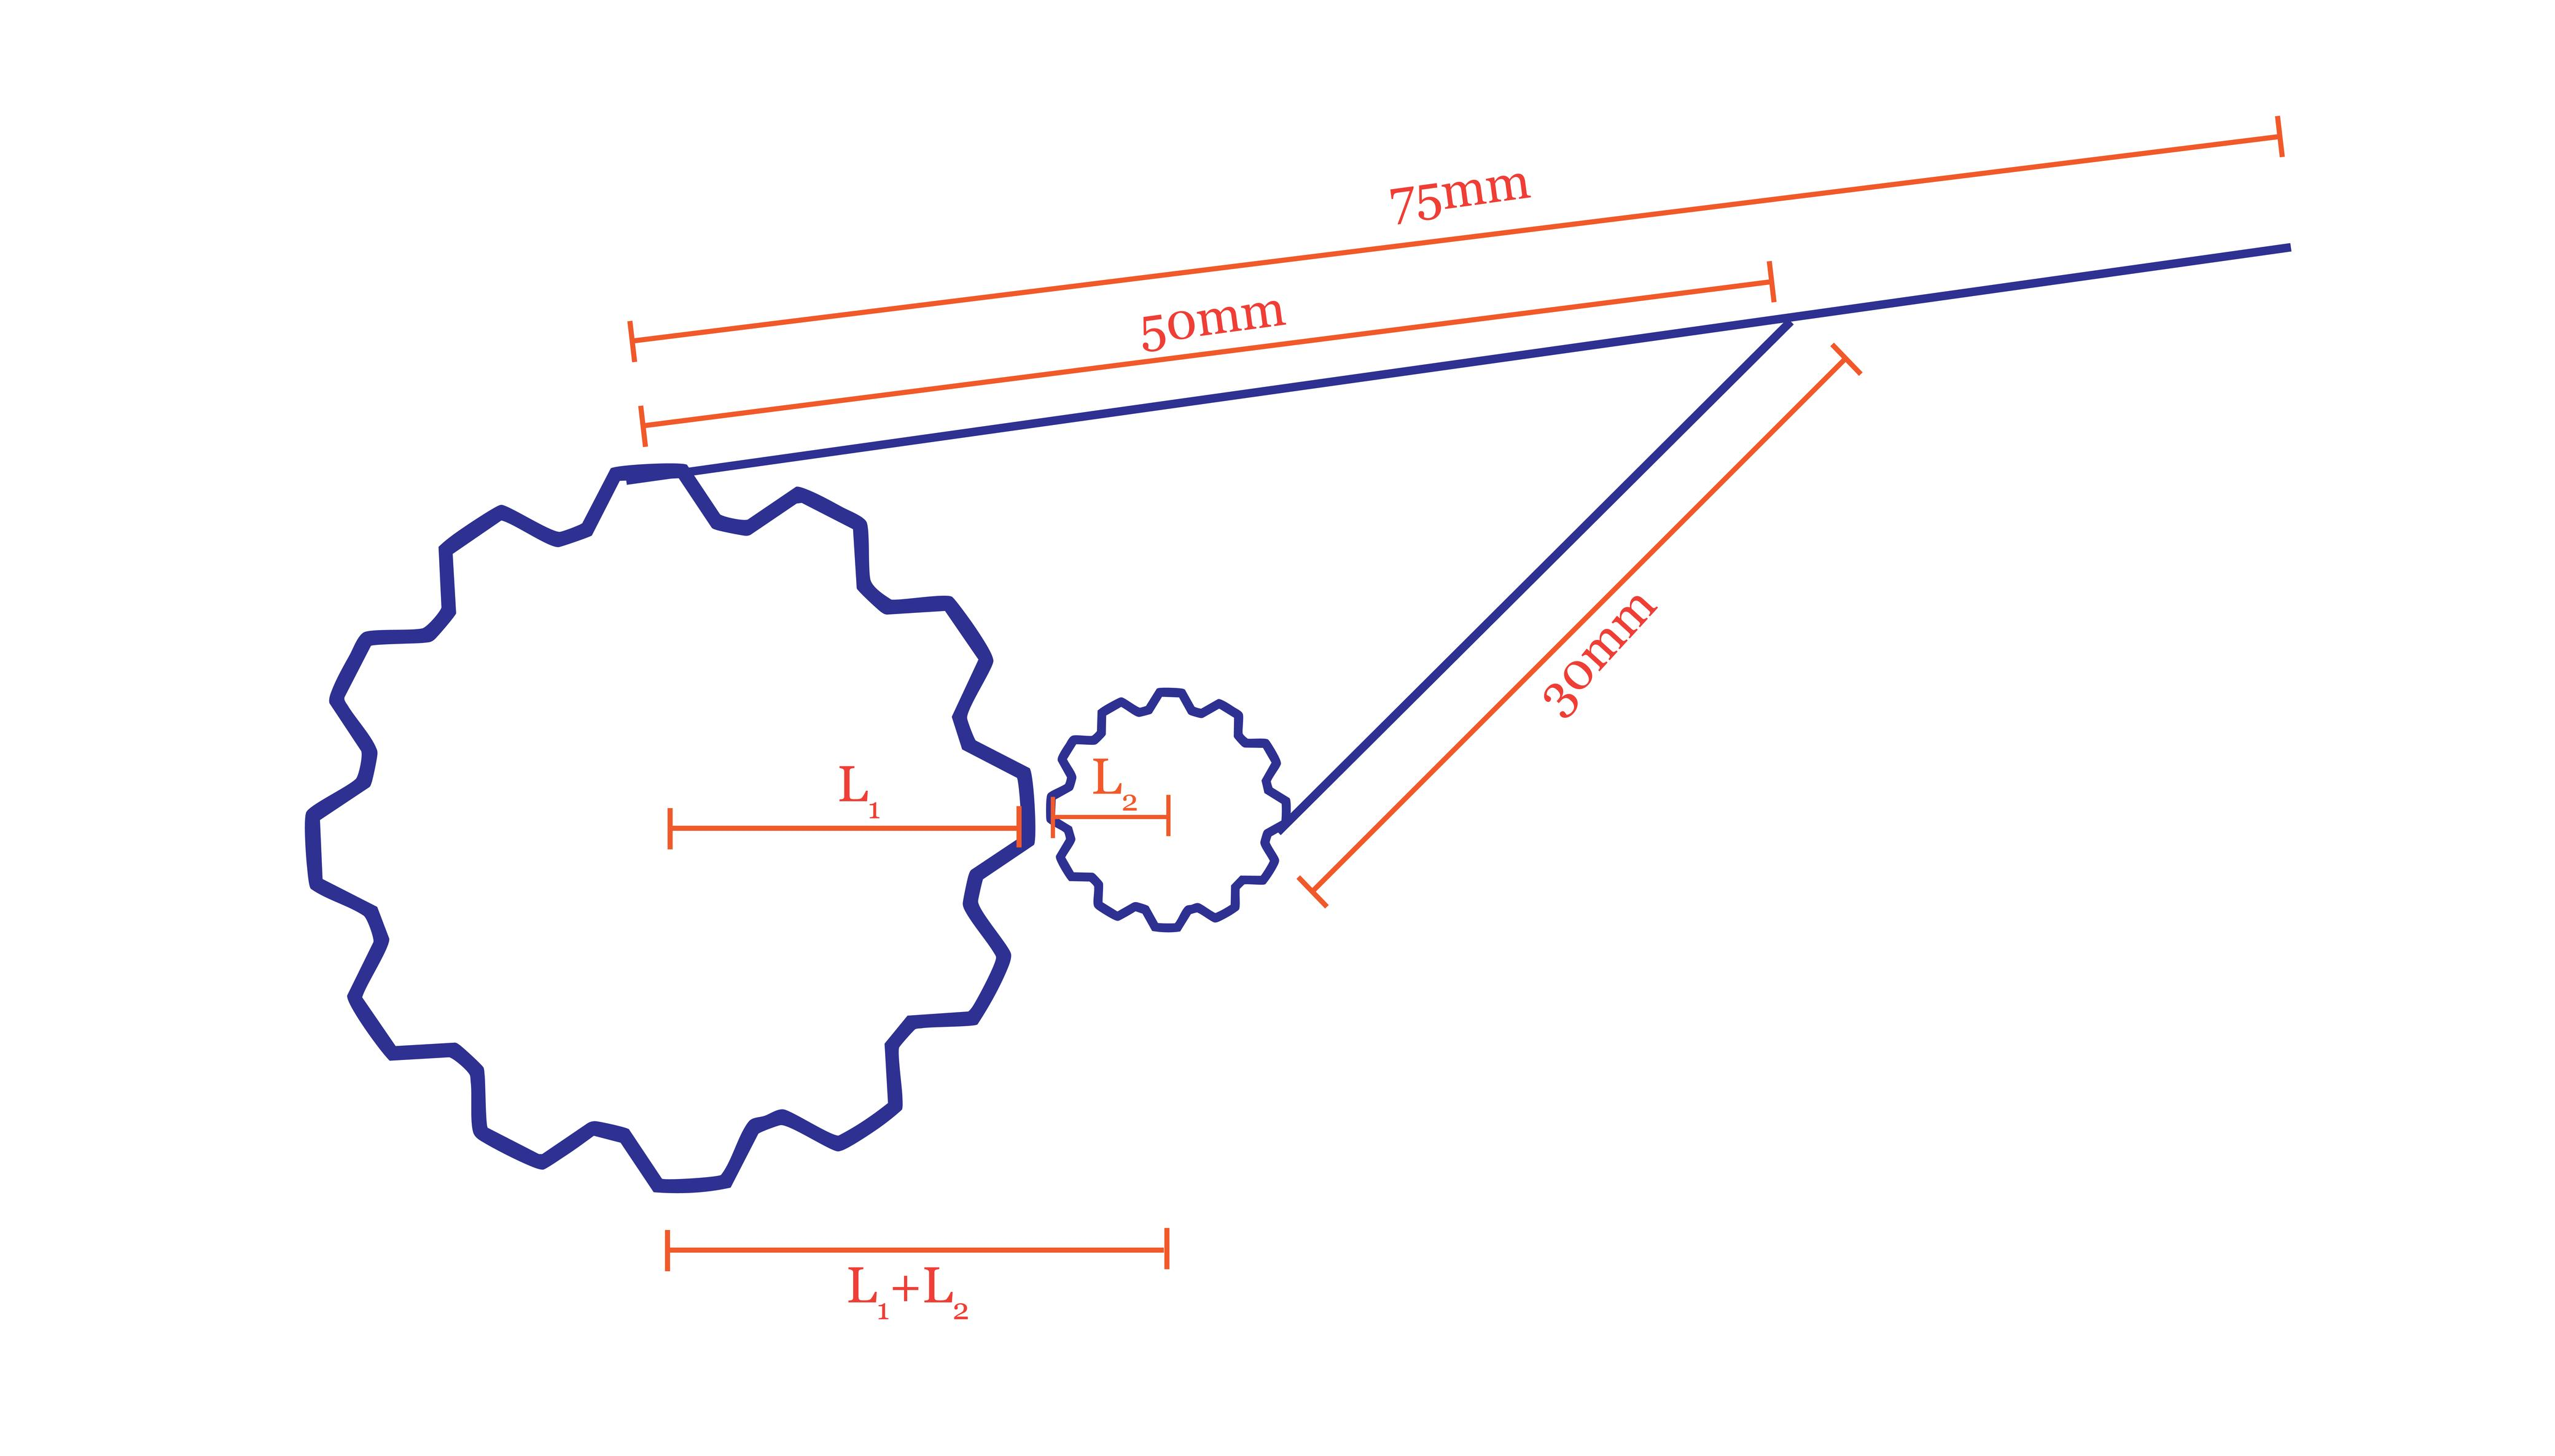

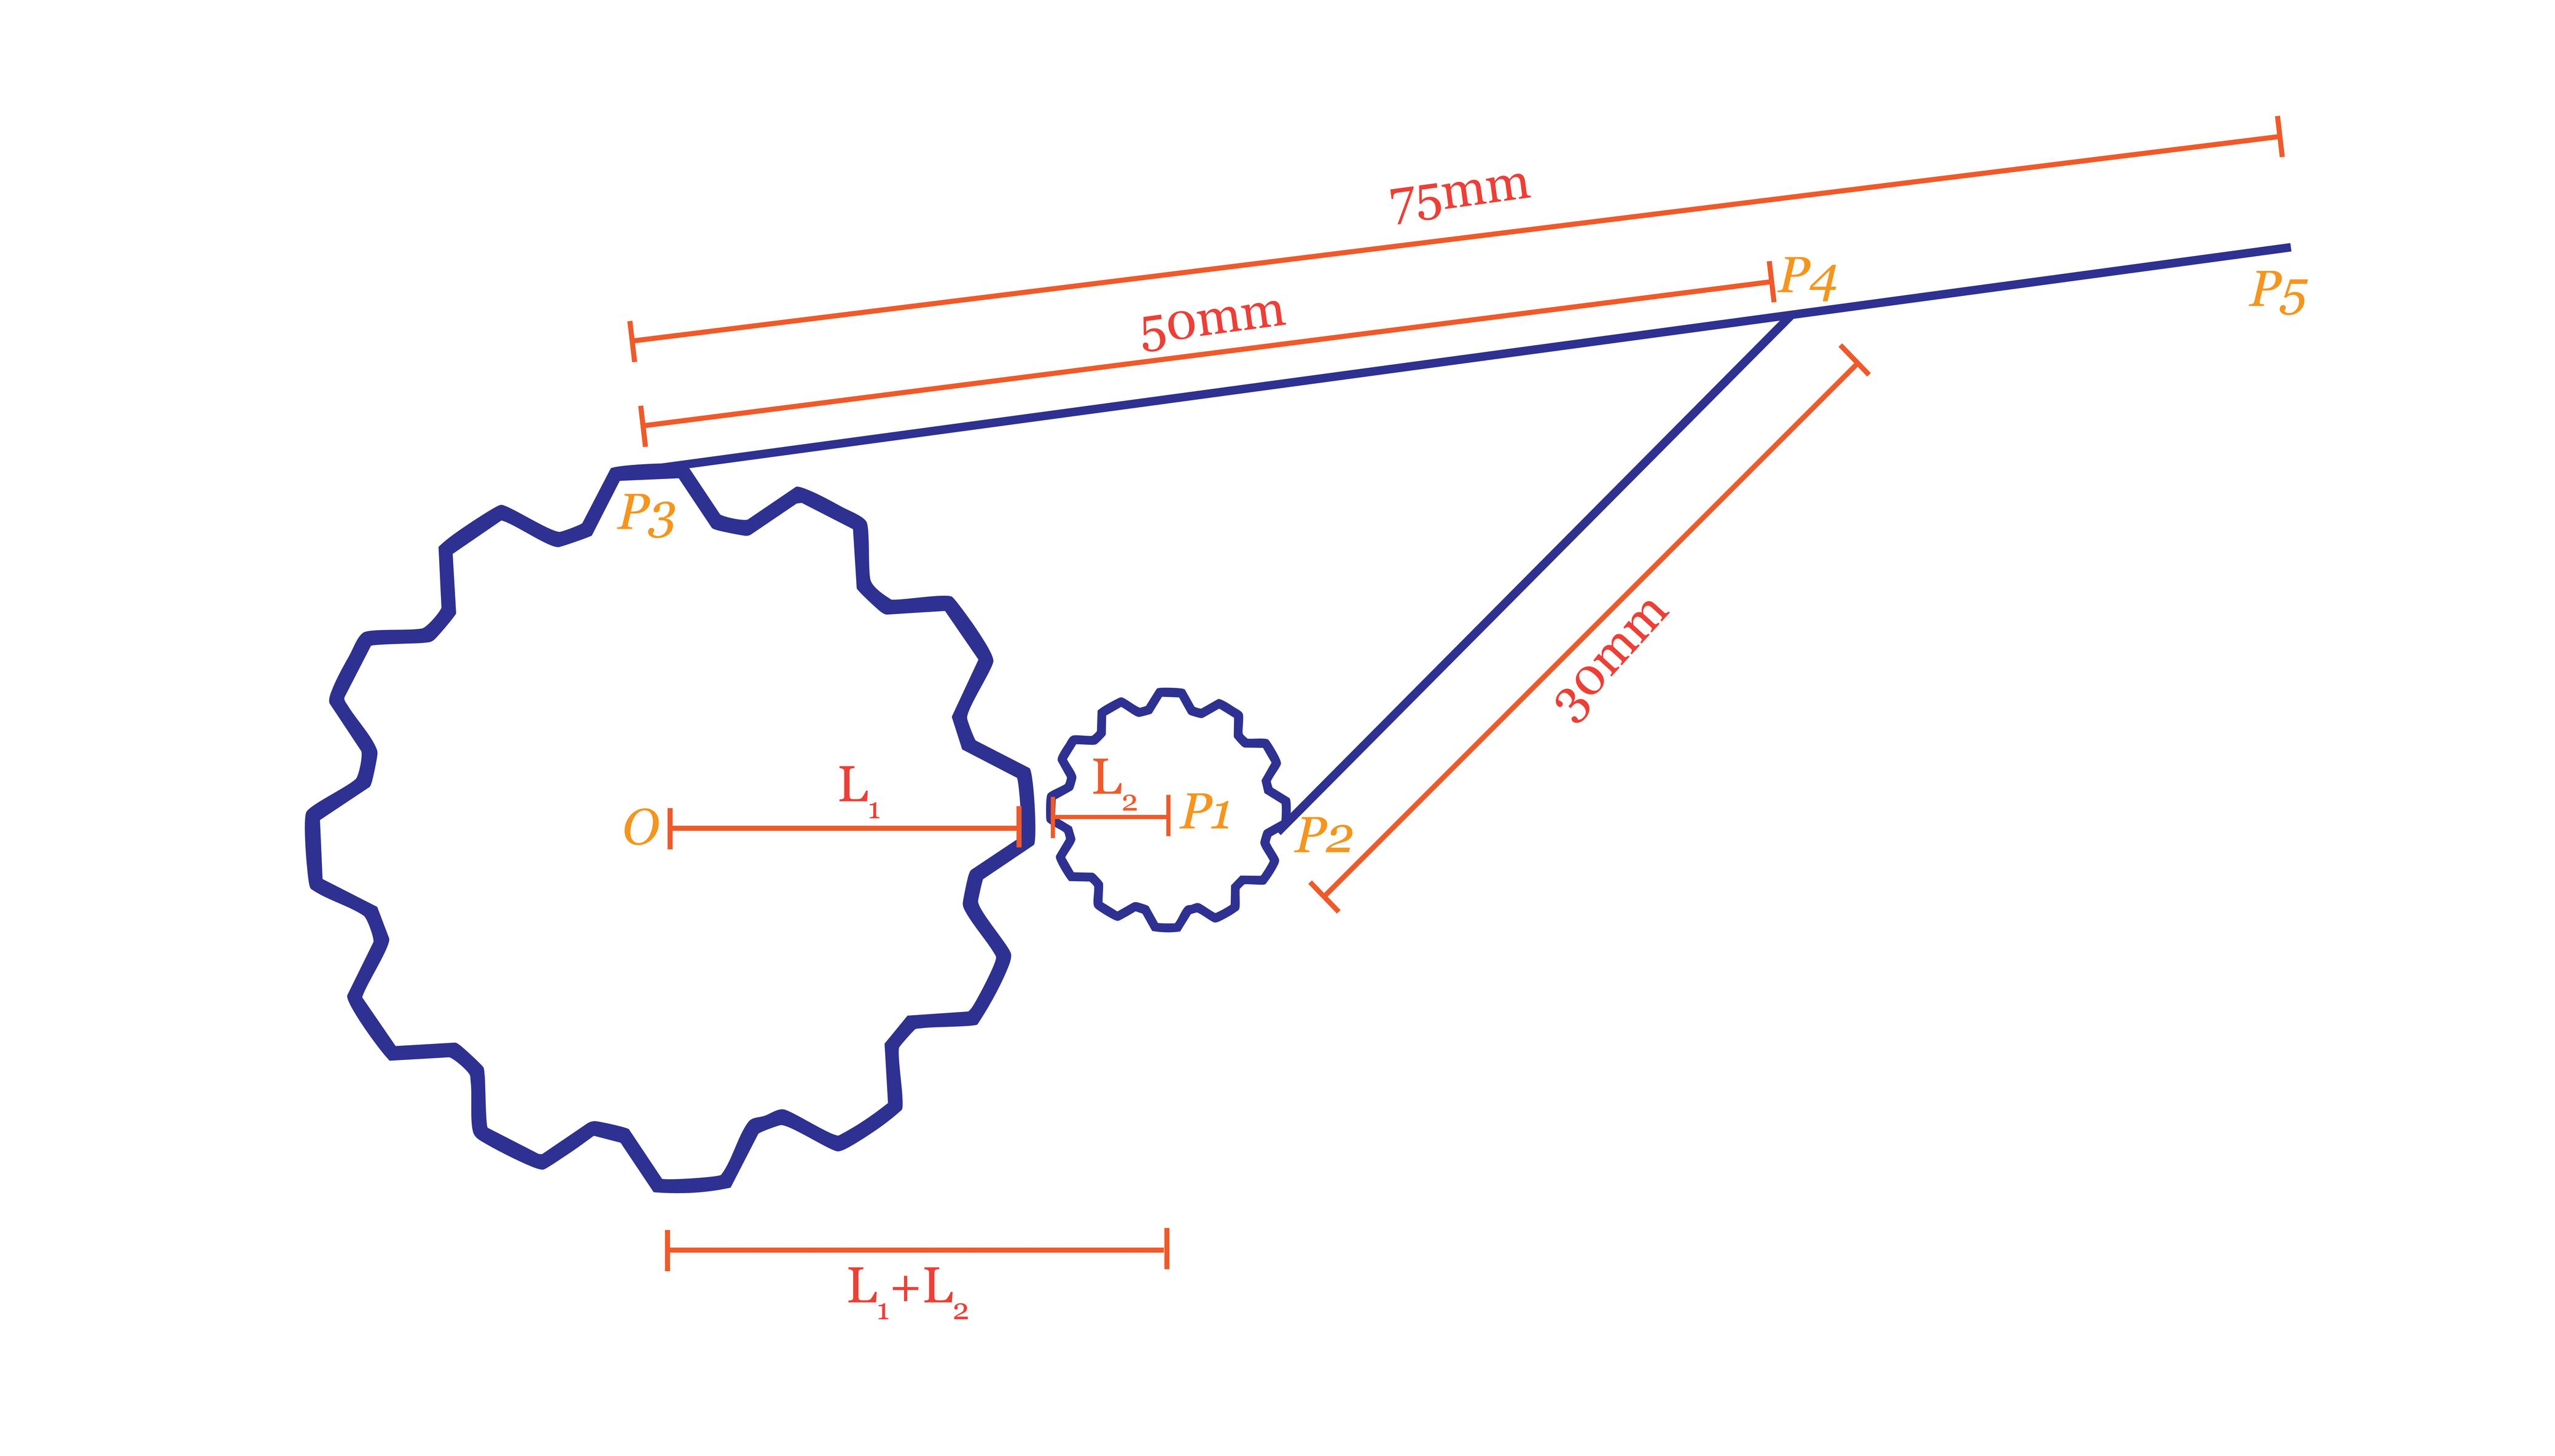

<em><font color='black'><left>Definimos los parametros</left></font></em>



<font color='black'><left>
Para este analisis, se usa el mecanismo 'geared five-bar' [1], donde el engrane grande y el pequeño actúan como eslabones que giran en torno a ejes fijos en el bastidor. El mecanismo conserva un solo grado de libertad: al girar uno de los engranajes, el otro se ve obligado a rotar con una velocidad angular impuesta por la razón geométrica de los radios, y las barras restantes siguen la trayectoria establecida por la cinemática de la cadena. <br><br>
<strong>Parametros de diseño:</strong><br>
<font color='black'><left>
1. <strong>Tamaño de los engranajes:</strong> <br>
Expresandolos por sus radios:
<br>L<sub>1</sub> para el engranaje grande
<br>L<sub>2</sub> para el engrane pequeño.
<br>Como se trata de un <i>geared five-bar linkage</i>, estos engranes están siempre en contacto.</li> Al variar L<sub>1</sub> o L<sub>2</sub>, cambia la relación de transmisión y, por tanto, la cinemática global del mecanismo también se ve afectada.</li>
<br><br>
<li><strong>Distancia entre centros</strong> de los engranajes:</li><br>
d = L<sub>1</sub> + L<sub>2</sub><br>
<br>Donde d es la distancia entre centros, L<sub>1</sub> es el radio del engranaje grande y L<sub>2</sub> es el radio del engranaje pequeño.<br><br>
<li><strong>Longitud de los eslabones:</strong></li><br>
Las barras de 75 mm y 30 mm permanecen con tamaño constante y se intersecan a los 50 mm de la barra más larga (P4). Es decir, que hay una revoluta en los 50 mm de la barra larga (P4).

</ul>
<br>
Por lo tanto, el par de engranajes y la longitud de los eslabones constituyen los elementos centrales del modelo de diseño. Entonces, el tamaño de los engranajes y la distancia entre ellos se consideran los principales parámetros de ajuste, y las longitudes fijas de los eslabones delimitan un espacio de configuración constante. Con este enfoque, se logra un análisis más claro del impacto de las variaciones en los radios de los engranajes sobre la cinemática del mecanismo sin alterar la esquemática general.
</left></font>

<strong><font color='black'><h1><left> Ejercicio 2</left><h1></strong>


</font>

<strong><font color='black'><u><h1><left>Solución - Ejercicio 2:</left><h1></font></strong>

<em><font color='black'><left>Definimos las ecuaciones</left></font></em>



In [134]:
def mecanismo_cinco_barras(L1, L2, L3, L4, L5, angulo1, angulo2, para_graficar):

    # Convertir ángulos a radianes
    angulo1 = np.deg2rad(angulo1)

    angulo2 = np.deg2rad(angulo2)

    # Calcular la posición de P3 y P2 usando los ángulos de entrada
    P3 = (L1 * np.cos(angulo1), L1 * np.sin(angulo1))

    P2 = (L5 + L2 * np.cos(angulo2), L2 * np.sin(angulo2))

    # Calcular la posición de P4 usando intersección de círculos
    d = np.linalg.norm(np.array(P3) - np.array(P2))

    if d == 0 or 2 * d == 0:

        raise ValueError("Distancia d inválida, puede provocar división por cero")

    a = (L3**2 - L4**2 + d**2) / (2 * d)

    h_arg = L3**2 - a**2

    h = np.sqrt(max(h_arg, 0))

    P0 = np.array(P3) + a * (np.array(P2) - np.array(P3)) / d

    # Dos posibles soluciones para P4
    P4_1 = (P0[0] + h * (P2[1] - P3[1]) / d, P0[1] - h * (P2[0] - P3[0]) / d)

    P4_2 = (P0[0] - h * (P2[1] - P3[1]) / d, P0[1] + h * (P2[0] - P3[0]) / d)

    # Soluciones para la punta del mecanismo
    P5_1 = (P4_1[0] + (L4 / 2) * (P4_1[0] - P3[0]) / L4, P4_1[1] + (L4 / 2) * (P4_1[1] - P3[1]) / L4)

    P5_2 = (P4_2[0] + (L4 / 2) * (P4_2[0] - P3[0]) / L4, P4_2[1] + (L4 / 2) * (P4_2[1] - P3[1]) / L4)

    return P2, P3, P4_1, P4_2, P5_1, P5_2

<em><font color='black'><left>Graficamos</left></font></em>



In [135]:
def animar_mecanismo_cinco_barras(L1, L2, L3, L4, L5, lista_ang1, lista_ang2, configuracion=1, videoName="mecanismo_cinco_barras.gif"):

    fig, ax = plt.subplots(figsize=(6,6))

    def actualizar(i):

        ang1 = lista_ang1[i]

        ang2 = lista_ang2[i]

        P2, P3, P4_1, P4_2, P5_1, P5_2 = mecanismo_cinco_barras(L1, L2, L3, L4, L5, ang1, ang2, True)

        P4, P5 = (P4_2, P5_2)

        ax.clear()
        ax.set_title(f"Frame {i}: ang1 = {ang1:.1f}°, ang2 = {ang2:.1f}°")
        ax.plot([0, P3[0]], [0, P3[1]], color='#8A0947',marker = 'p', label='L1')
        ax.plot([L5, P2[0]], [0, P2[1]], color='#DB3813',marker = 'p' , label='L2')
        ax.plot([P3[0], P4[0]], [P3[1], P4[1]], color='#CF1C12',marker = 'p', label='L3')
        ax.plot([P2[0], P4[0]], [P2[1], P4[1]], color='#480745',marker = 'p', label='L4')
        ax.plot([P4[0], P5[0]], [P4[1], P5[1]], color='#CF1C12',marker = 'p')
        ax.set_xlim(-40, 100)
        ax.set_ylim(-40, 100)
        ax.legend(loc='lower left')
        ax.grid()

    anim = animation.FuncAnimation(fig, actualizar, frames=len(lista_ang1), interval=100, repeat=True)

    anim.save(videoName, writer="pillow", dpi=200)

    plt.close(fig)

    return anim

def graficar_trayectoria_punta(L1, L2, L3, L4, L5, lista_ang1, lista_ang2):

    trayectoria_x = []

    trayectoria_y = []

    for ang1, ang2 in zip(lista_ang1, lista_ang2):

        _, _, _, _, _, P5_2 = mecanismo_cinco_barras(L1, L2, L3, L4, L5, ang1, ang2, False)

        trayectoria_x.append(P5_2[0])

        trayectoria_y.append(P5_2[1])

    plt.figure(figsize=(6,6))
    plt.plot(trayectoria_x, trayectoria_y, color='#DB3813', label='Trayectoria de la punta del mecanismo (P5_2)')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Trayectoria de la Punta del mecanismo")
    plt.legend(loc='upper left')
    plt.tick_params(direction='out', length=7, width=0.75, grid_alpha=0.6)
    plt.grid()
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    plt.show()

<em><font color='black'><left>Ejemplo 1</left></font></em>



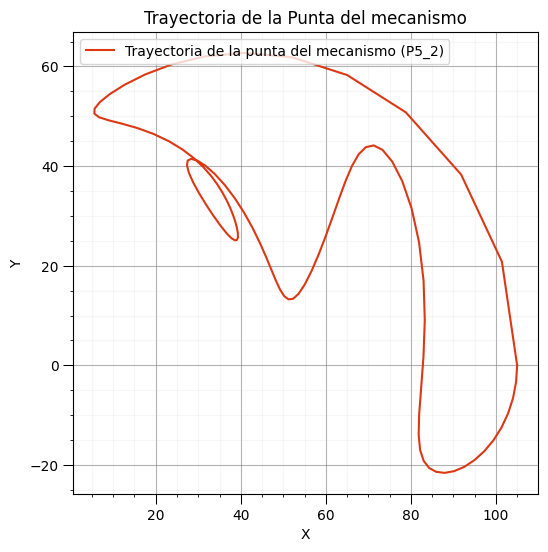

La animación se ha guardado en 'mecanismo_cinco_barras.gif'.


In [136]:
# Parámetros del mecanismo (L1 tres veces mas grande que L2)
L1 = 30

L2 = 10

L3 = 50

L4 = 30

L5 = 40

# Listas de ángulos para la trayectoria
num_frames = 100

#Para animar correctamente la relación de transmisión se deben escoger los angulos considerandola
#Es decir, si El engranaje 1 (L1) es 3 veces más grande que el engranaje 2 (L2) entonces debe moverse 3 veces mas lento

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(1080, 0, num_frames)

# Graficar la trayectoria de la punta del mecanismo
graficar_trayectoria_punta(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

# Crear la animación
anim = animar_mecanismo_cinco_barras(L1, L2, L3, L4, L5, lista_ang1, lista_ang2, configuracion=1, videoName="mecanismo_cinco_barras.gif")

print("La animación se ha guardado en 'mecanismo_cinco_barras.gif'.")

<em><font color='black'><left>Ejemplo 2</left></font></em>



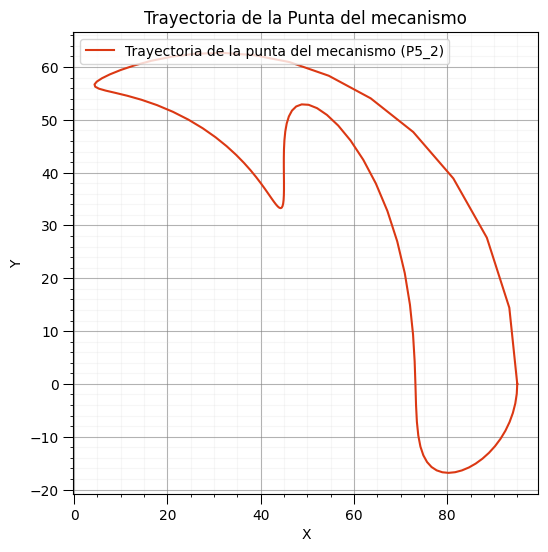

In [122]:
# Parámetros del mecanismo (L1 dos veces mas grande que L2)
L1 = 20

L2 = 10

L3 = 50

L4 = 30

L5 = 30

num_frames = 100

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(720, 0, num_frames)

# Graficar la trayectoria de la punta del mecanismo
graficar_trayectoria_punta(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

In [123]:
#Nueva animacion

anim = animar_mecanismo_cinco_barras(L1, L2, L3, L4, L5, lista_ang1, lista_ang2, configuracion=1, videoName="mecanismo_cinco_barras2.gif")

print("La animación se ha guardado en 'mecanismo_cinco_barras2.gif'.")

La animación se ha guardado en 'mecanismo_cinco_barras2.gif'.


<em><font color='black'><left>Ejemplo 3</left></font></em>



In [ ]:
# Parámetros del mecanismo (L1 mismo tamano que L2)
L1 = 10

L2 = 10

L3 = 50

L4 = 30

L5 = 20

num_frames = 100

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(360, 0, num_frames)

# Graficar la trayectoria de la punta del mecanismo
graficar_trayectoria_punta(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

In [ ]:
#Nueva animacion

anim = animar_mecanismo_cinco_barras(L1, L2, L3, L4, L5, lista_ang1, lista_ang2, configuracion=1, videoName="mecanismo_cinco_barras3.gif")

print("La animación se ha guardado en 'mecanismo_cinco_barras3.gif'.")

<em><font color='black'><left>Ejemplo 4</left></font></em>



<font color='black'><left>
En este ejemplo 4 se está explorando el cambio de otro parámetro de diseño que me pareció interesante. Es el mismo mecanismo del ejemplo 1 pero el eslabón L4 es del mismo tamaño que L3.
</left></font>

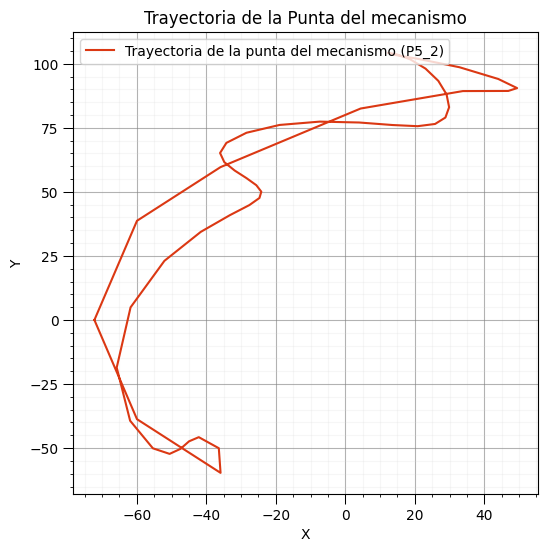

In [126]:
# Parámetros del mecanismo (L4 mismo tamano de todo el eslabón L3)
L1 = 30

L2 = 10

L3 = 50 #Hasta la punta del mecanismo son 25 más, por lo que todo el eslabón L3 se podría considerar de 75

L4 = 75

L5 = 40

# Listas de ángulos para la trayectoria
num_frames = 50

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(1080, 0, num_frames)

# Graficar la trayectoria de la punta del mecanismo
graficar_trayectoria_punta(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

In [127]:
# Nueva Animación
anim = animar_mecanismo_cinco_barras(L1, L2, L3, L4, L5, lista_ang1, lista_ang2, configuracion=1, videoName="mecanismo_cinco_barras4.gif")

print("La animación se ha guardado en 'mecanismo_cinco_barras4.gif'.")

La animación se ha guardado en 'mecanismo_cinco_barras4.gif'.


<strong><font color='black'><h1><left> Ejercicio 3</left><h1></strong>


</font>

<strong><font color='black'><u><h1><left>Solución - Ejercicio 3:</left><h1></font></strong>

<em><font color='black'><left>Definimos las ecuaciones</left></font></em>



In [ ]:
def mecanismo_cinco_barras(L1, L2, L3, L4, L5, angulo1, angulo2, para_graficar):

    # Convertir ángulos a radianes
    angulo1 = np.deg2rad(angulo1)

    angulo2 = np.deg2rad(angulo2)

    # Calcular la posición de P3 y P2 usando los ángulos de entrada
    P3 = (L1 * np.cos(angulo1), L1 * np.sin(angulo1))

    P2 = (L5 + L2 * np.cos(angulo2), L2 * np.sin(angulo2))

    # Calcular la posición de P4 usando intersección de círculos
    d = np.linalg.norm(np.array(P3) - np.array(P2))

    if d == 0 or 2 * d == 0:

        raise ValueError("Distancia d inválida, puede provocar división por cero")

    a = (L3**2 - L4**2 + d**2) / (2 * d)

    h_arg = L3**2 - a**2

    h = np.sqrt(max(h_arg, 0))

    P0 = np.array(P3) + a * (np.array(P2) - np.array(P3)) / d

    # Dos posibles soluciones para P4
    P4_1 = (P0[0] + h * (P2[1] - P3[1]) / d, P0[1] - h * (P2[0] - P3[0]) / d)

    P4_2 = (P0[0] - h * (P2[1] - P3[1]) / d, P0[1] + h * (P2[0] - P3[0]) / d)

    # Soluciones para la punta del mecanismo
    P5_1 = (P4_1[0] + (L4 / 2) * (P4_1[0] - P3[0]) / L4, P4_1[1] + (L4 / 2) * (P4_1[1] - P3[1]) / L4)

    P5_2 = (P4_2[0] + (L4 / 2) * (P4_2[0] - P3[0]) / L4, P4_2[1] + (L4 / 2) * (P4_2[1] - P3[1]) / L4)

    # Cálculo del ángulo de transmisión (entre L3 y L4)

    vector_L3 = np.array(P4_2) - np.array(P2)

    vector_L4 = np.array(P4_2) - np.array(P3)

    cos_theta = np.dot(vector_L3, vector_L4) / (np.linalg.norm(vector_L3) * np.linalg.norm(vector_L4))

    angulo_transmision = np.arccos(np.clip(cos_theta, -1, 1))

    angulo_transmision = np.degrees(angulo_transmision)

    return P2, P3, P4_1, P4_2, P5_1, P5_2, angulo_transmision

<em><font color='black'><left>Graficamos</left></font></em>



In [129]:
def graficar_trayectoria_y_angulo(L1, L2, L3, L4, L5, lista_ang1, lista_ang2):

    trayectoria_x = []

    trayectoria_y = []

    angulos_transmision = []

    for ang1, ang2 in zip(lista_ang1, lista_ang2):

        _, _, _, P4_2, _, P5_2, angulo_transmision = mecanismo_cinco_barras(L1, L2, L3, L4, L5, ang1, ang2, False)

        trayectoria_x.append(P5_2[0])

        trayectoria_y.append(P5_2[1])

        angulos_transmision.append(angulo_transmision)

    # Graficar la trayectoria de la punta del segmento extra
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(trayectoria_x, trayectoria_y, color='#DB3813', label='Trayectoria de la punta del mecanismo (P5_2)')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Trayectoria de la Punta del mecanismo")
    plt.legend()
    plt.tick_params(direction='out', length=7, width=0.75, grid_alpha=0.6)
    plt.grid()
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)

    # Graficar el ángulo de transmisión
    plt.subplot(1,2,2)
    plt.plot(lista_ang1, angulos_transmision, color='#00325E', label='Ángulo de Transmisión (L3 y L4)')
    plt.xlabel("Ángulo de entrada (°)")
    plt.ylabel("Ángulo de Transmisión (°)")
    plt.title("Ángulo de Transmisión en función del Ángulo de Entrada")
    plt.legend()
    plt.tick_params(direction='out', length=7, width=0.75, grid_alpha=0.6)
    plt.grid()
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)

    plt.tight_layout()
    plt.show()

<em><font color='black'><left>Ejemplo 1</left></font></em>



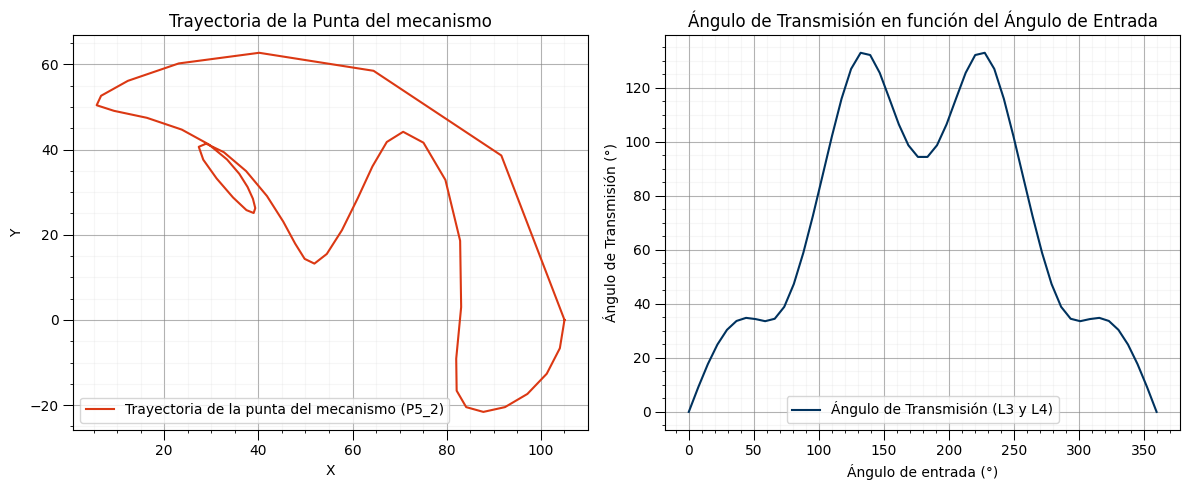

In [130]:
# Parámetros del mecanismo
L1 = 30

L2 = 10

L3 = 50

L4 = 30

L5 = 40

# Listas de ángulos para la trayectoria
num_frames = 50

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(1080, 0, num_frames)

# Graficar la trayectoria de la punta del mecanismo y el ángulo de transmisión
graficar_trayectoria_y_angulo(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

<em><font color='black'><left>Ejemplo 2</left></font></em>



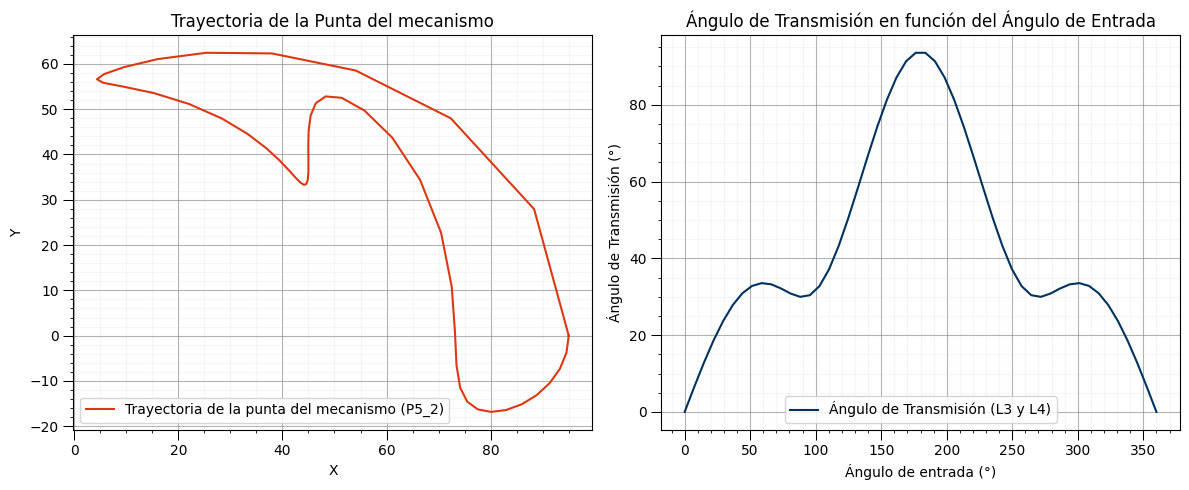

In [131]:
# Parámetros del mecanismo
L1 = 20

L2 = 10

L3 = 50

L4 = 30

L5 = 30

# Listas de ángulos para la trayectoria
num_frames = 50

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(720, 0, num_frames)

# Graficar la trayectoria de la punta del mecanismo y el ángulo de transmisión
graficar_trayectoria_y_angulo(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

<em><font color='black'><left>Ejemplo 3</left></font></em>



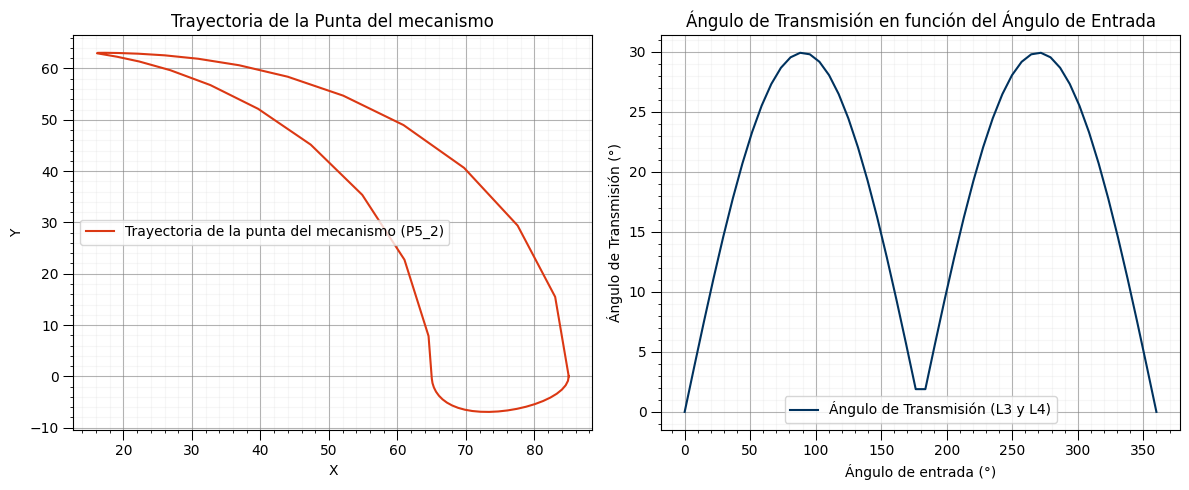

In [132]:
# Parámetros del mecanismo
L1 = 10

L2 = 10

L3 = 50

L4 = 30

L5 = 20

# Listas de ángulos para la trayectoria
num_frames = 50

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(360, 0, num_frames)

# Graficar la trayectoria de la punta del mecanismo y el ángulo de transmisión
graficar_trayectoria_y_angulo(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

<em><font color='black'><left>Ejemplo 4</left></font></em>



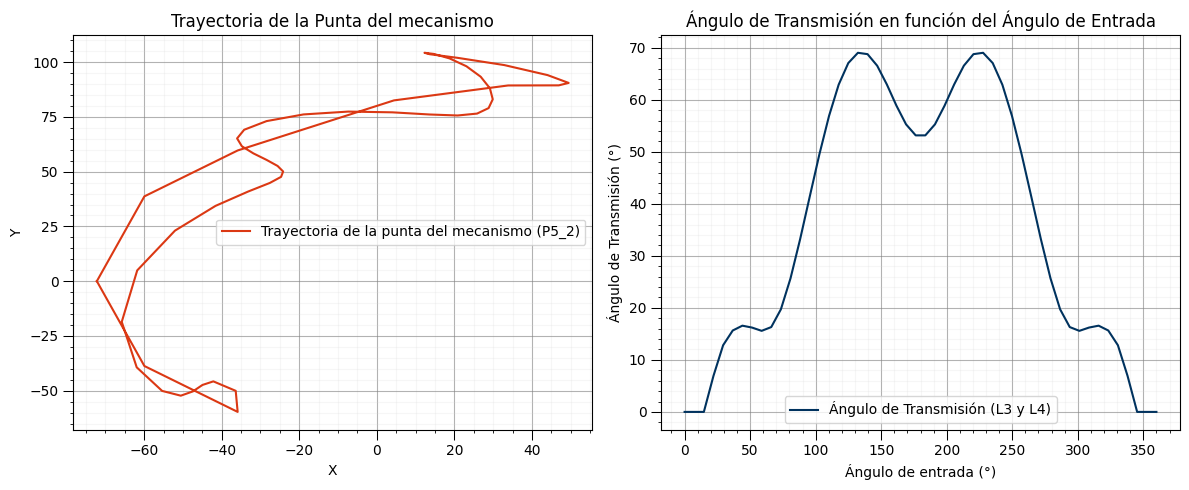

In [133]:
# Parámetros del mecanismo
L1 = 30

L2 = 10

L3 = 50

L4 = 75

L5 = 40

# Listas de ángulos para la trayectoria
num_frames = 50

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(1080, 0, num_frames)

# Graficar la trayectoria de la punta del mecanismo y el ángulo de transmisión
graficar_trayectoria_y_angulo(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

<strong><font color='black'><h1><left> Ejercicio 4</left><h1></strong>


</font>

<strong><font color='black'><u><h1><left>Solución - Ejercicio 4:</left><h1></font></strong>

<em><font color='black'><left>Definimos las ecuaciones</left></font></em>



In [142]:
def mecanismo_cinco_barras(L1, L2, L3, L4, L5, angulo1, angulo2, para_graficar):

    # Convertir ángulos a radianes
    angulo1 = np.deg2rad(angulo1)

    angulo2 = np.deg2rad(angulo2)

    # Calcular la posición de P3 y P2 usando los ángulos de entrada
    P3 = (L1 * np.cos(angulo1), L1 * np.sin(angulo1))

    P2 = (L5 + L2 * np.cos(angulo2), L2 * np.sin(angulo2))

    # Calcular la posición de P4 usando intersección de círculos
    d = np.linalg.norm(np.array(P3) - np.array(P2))

    if d == 0 or 2 * d == 0:

        raise ValueError("Distancia d inválida, puede provocar división por cero")

    a = (L3**2 - L4**2 + d**2) / (2 * d)

    h_arg = L3**2 - a**2

    h = np.sqrt(max(h_arg, 0))

    P0 = np.array(P3) + a * (np.array(P2) - np.array(P3)) / d

    # Dos posibles soluciones para P4
    P4_1 = (P0[0] + h * (P2[1] - P3[1]) / d, P0[1] - h * (P2[0] - P3[0]) / d)

    P4_2 = (P0[0] - h * (P2[1] - P3[1]) / d, P0[1] + h * (P2[0] - P3[0]) / d)

    # Soluciones para la punta del mecanismo
    P5_1 = (P4_1[0] + (L4 / 2) * (P4_1[0] - P3[0]) / L4, P4_1[1] + (L4 / 2) * (P4_1[1] - P3[1]) / L4)

    P5_2 = (P4_2[0] + (L4 / 2) * (P4_2[0] - P3[0]) / L4, P4_2[1] + (L4 / 2) * (P4_2[1] - P3[1]) / L4)

    # Cálculo del ángulo de transmisión (entre L3 y L4)

    vector_L3 = np.array(P4_2) - np.array(P2)

    vector_L4 = np.array(P4_2) - np.array(P3)

    cos_theta = np.dot(vector_L3, vector_L4) / (np.linalg.norm(vector_L3) * np.linalg.norm(vector_L4))

    angulo_transmision = np.arccos(np.clip(cos_theta, -1, 1))

    angulo_transmision = np.degrees(angulo_transmision)

    return P2, P3, P4_1, P4_2, P5_1, P5_2, angulo_transmision

<em><font color='black'><left>Graficamos</left></font></em>



In [143]:
def calcular_torque_entrada(L1, L2, L3, L4, L5, lista_ang1, lista_ang2, F_ext=10):
#Una fuerza externa escogida arbitrariamente de 10 N
    torques = []

    for ang1, ang2 in zip(lista_ang1, lista_ang2):

        _, _, _, P4_2, _, _, angulo_transmision = mecanismo_cinco_barras(L1, L2, L3, L4, L5, ang1, ang2, False)

        brazo_momento = np.linalg.norm(np.array(P4_2))

        torque = F_ext * brazo_momento * np.sin(np.radians(angulo_transmision))

        torques.append(torque)

            # Graficar el torque requerido
    plt.figure(figsize=(6,6))
    plt.plot(lista_ang1, torques, color = '#480745', label='Torque de entrada requerido')
    plt.xlabel("Ángulo de entrada (°)")
    plt.ylabel("Torque (N·m)")
    plt.title("Torque de Entrada Requerido para Mover el Mecanismo")
    plt.legend()
    plt.grid()
    plt.show()

<em><font color='black'><left>Ejemplo 1</left></font></em>



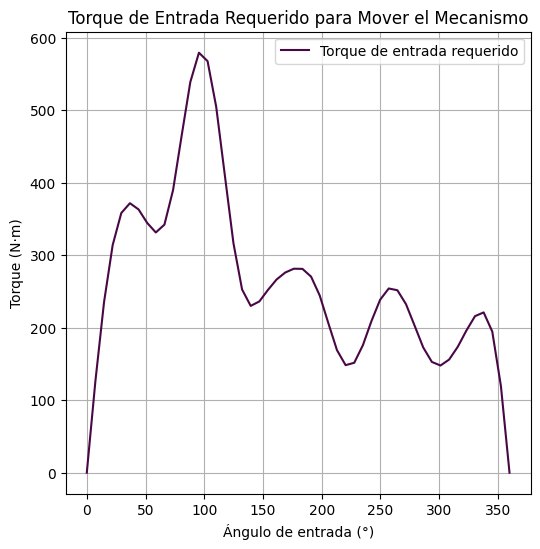

In [144]:
# Parámetros del mecanismo
L1 = 30

L2 = 10

L3 = 50

L4 = 30

L5 = 40

# Listas de ángulos para la trayectoria
num_frames = 50

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(1080, 0, num_frames)

# Calcular y graficar el torque de entrada requerido
calcular_torque_entrada(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

<em><font color='black'><left>Ejemplo 2</left></font></em>



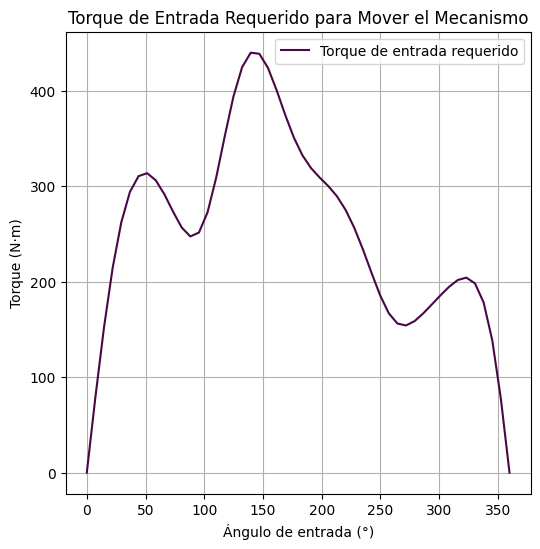

In [145]:
# Parámetros del mecanismo
L1 = 20

L2 = 10

L3 = 50

L4 = 30

L5 = 30

# Listas de ángulos para la trayectoria
num_frames = 50

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(720, 0, num_frames)

# Calcular y graficar el torque de entrada requerido
calcular_torque_entrada(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

<em><font color='black'><left>Ejemplo 3</left></font></em>



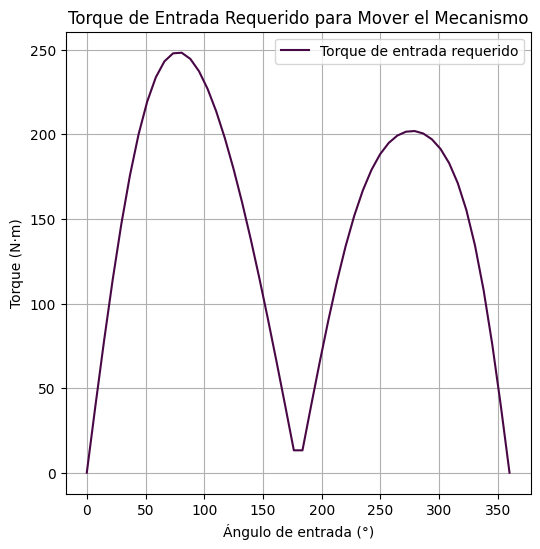

In [146]:
# Parámetros del mecanismo
L1 = 10

L2 = 10

L3 = 50

L4 = 30

L5 = 20

# Listas de ángulos para la trayectoria
num_frames = 50

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(360, 0, num_frames)

# Calcular y graficar el torque de entrada requerido
calcular_torque_entrada(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

<em><font color='black'><left>Ejemplo 4</left></font></em>



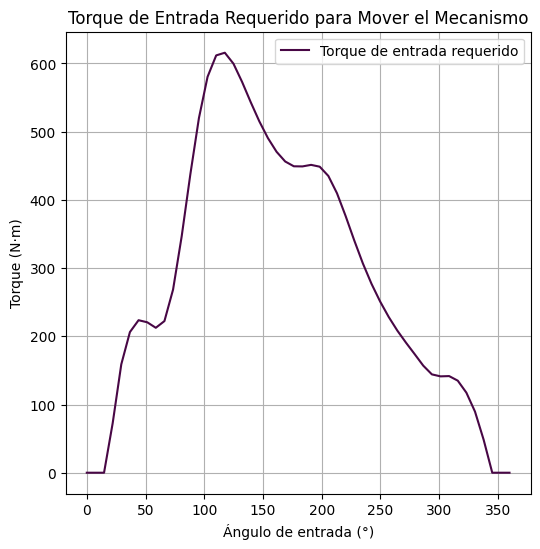

In [147]:
# Parámetros del mecanismo
L1 = 30

L2 = 10

L3 = 50

L4 = 75

L5 = 40

# Listas de ángulos para la trayectoria
num_frames = 50

lista_ang1 = np.linspace(0, 360, num_frames)

lista_ang2 = np.linspace(1080, 0, num_frames)

# Calcular y graficar el torque de entrada requerido
calcular_torque_entrada(L1, L2, L3, L4, L5, lista_ang1, lista_ang2)

<em><font color='black'><left>Referencias:</left></font></em><br><br>
<font color='black'>
[1] R. L. Norton, Design of machinery : an introduction to synthesis and analysis of mechanisms and machines. New York Mcgraw-Hill, 2014.
<font>